In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("preprocessed_dataset.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Probability Density

<Axes: xlabel='ssc_p', ylabel='Density'>

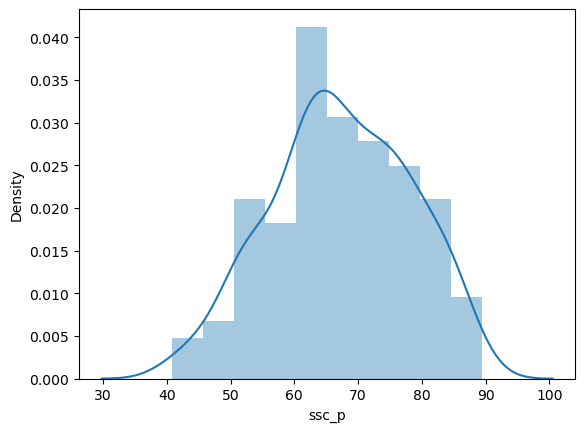

In [6]:
sns.distplot(dataset["ssc_p"])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #Generate a sample
    sample=dataset
    # calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f'% (sample_mean,sample_std))
    # Define the Distribution
    dist=norm(sample_mean,sample_std)
    # sample probabilities for range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303,Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


0.3449514151280293

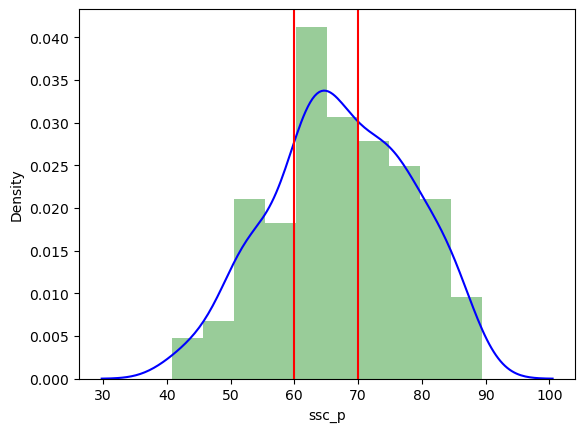

In [8]:
get_pdf_probability(dataset["ssc_p"],60,70)

## Cumulative Distribution Function

In [10]:
#! pip install statsmodels

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(80)

0.8651162790697674

## Standard Normal Distribution

In [13]:
def stdNBgraph (dataset):
    # Converted to standard normal distribution(Z_score)
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    Z_score=(dataset-mean)/std 
    #plot standardized histogram with KDE
    sns.histplot(Z_score,kde=True,stat="density",bins=15)
    # Set correct X_axis range for standard normal distribution
    plt.xlim(-3,3)
    # show the plot
    plt.show()

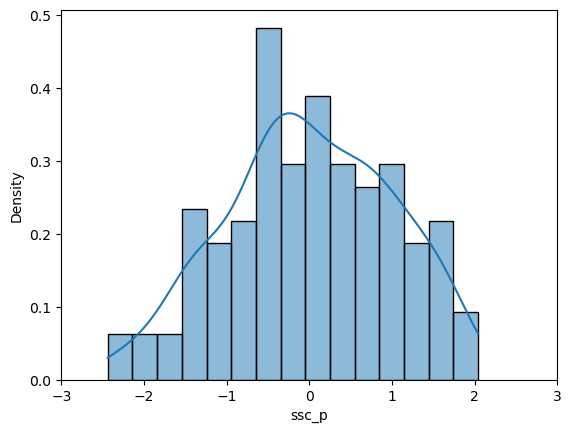

In [14]:
stdNBgraph (dataset["ssc_p"])